<a href="https://colab.research.google.com/github/joynaomi81/Language_Detection_Model_with_NLP/blob/main/Language_Detection_model_with_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import re

# 2. Load dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/language_dataset.csv')

# 3. Data review

In [3]:
df. head() #check for first 5 rows

,text,language
0,Sinkin bii ẹni jẹ tẹte oriire lawọn ọmọ orilee...,Yoruba
1,"Ninu ifẹsẹwọnsẹ to waye lọsan-an ọjọ Abamẹta, ...",Yoruba
2,"Nigba ti wọn bẹrẹ apa keji ifẹsẹwọnsẹ naa, baw...",Yoruba
3,"Ọrọ naa kọja sisọ, ilumọ-ọn-ka agbabọọlu agbay...",Yoruba
4,Ohun to tubọ gbomi loju wọn ti ọrọ naa fi ka w...,Yoruba


In [4]:
df.tail() #check for the last 5 rows

,text,language
12200,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
12201,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
12202,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
12203,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
12204,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [5]:
df.shape #check for the shape of the dataset

(12205, 2)

* 12205 rows
* 2 columns


In [6]:
df.info() #check for the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      12205 non-null  object
 1   language  12205 non-null  object
dtypes: object(2)
memory usage: 190.8+ KB


In [7]:
df.columns # Check for the columns

Index(['text', 'language'], dtype='object')

In [8]:
df.value_counts('language')

,count
language,
Yoruba,1934
English,1382
French,1007
Spanish,816
Portugeese,736
Italian,694
Russian,688
Sweedish,673
Malayalam,591


# 4. Data cleaning

In [9]:
# Check for missing values using isnull()
df.isnull().sum()

,0
text,0
language,0


In [10]:
# Checking for duplicate rows in the DataFrame
df.duplicated().sum()

0

# 5. Data visualization

# Bar Plot

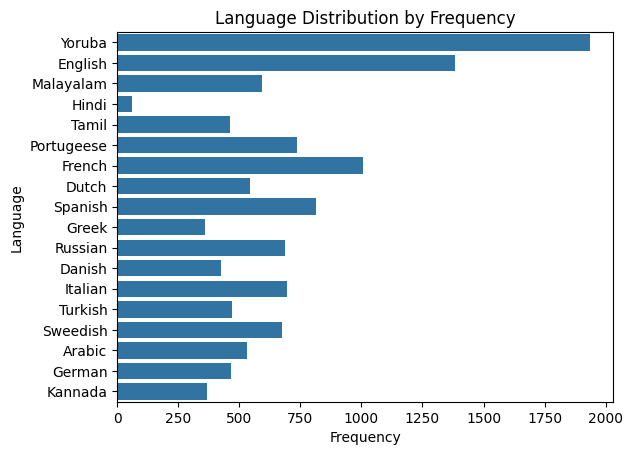

In [11]:
sns.countplot(df['language'])
plt.title('Language Distribution by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Language')
plt.show()

# Plot analysis
* Y- axis represents the languages
* X- axis represents the count


### Plot observation :
From the plot above,Yoruba language has the highest count in the dataset .

# Pie chart plot

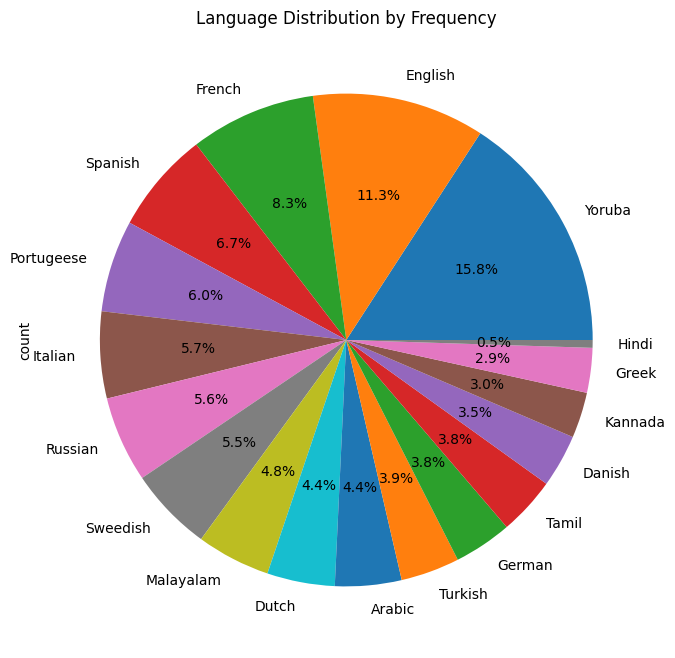

In [12]:
# Distribution of languages using Pie Chart
df['language'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(15, 8))

plt.title('Language Distribution by Frequency')
plt.show()

# 6. Text pre-processing

In [13]:
df['text'] = df['text'].str.lower()  # convert the text column into lower case
# remove special characters
pattern = r'[^A-Za-z0-9\s]+'
df['text'] = df['text'].apply(lambda x: re.sub(pattern, '', x))

In [14]:
df.head()

,text,language
0,sinkin bii ni j tte oriire lawn m orileede mor...,Yoruba
1,ninu ifswns to waye lsanan j abamta satide j k...,Yoruba
2,nigba ti wn br apa keji ifswns naa bawn agbabl...,Yoruba
3,r naa kja sis ilumnka agbablu agbaye nni chris...,Yoruba
4,ohun to tub gbomi loju wn ti r naa fi ka wn la...,Yoruba


In [15]:
def remove_html_tags(text):
  return re.sub(r'<.*?>', '', text)

df['text'] = df['text'].apply(lambda a: remove_html_tags(a))
df.head()

,text,language
0,sinkin bii ni j tte oriire lawn m orileede mor...,Yoruba
1,ninu ifswns to waye lsanan j abamta satide j k...,Yoruba
2,nigba ti wn br apa keji ifswns naa bawn agbabl...,Yoruba
3,r naa kja sis ilumnka agbablu agbaye nni chris...,Yoruba
4,ohun to tub gbomi loju wn ti r naa fi ka wn la...,Yoruba


In [16]:
# print rows containing HTML tags
def contains_html(text):
    return bool(re.search(r'<.*?>', str(text)))

html_rows = df[df['text'].apply(contains_html)]

print(html_rows)

Empty DataFrame
Columns: [text, language]
Index: []


In [17]:
def remove_url(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

###Splitting the data features and target variables.

* x = Features which is the 'Text' column.
* y = Labels which is the 'emotion' column.

In [18]:
x = df["text"]
y = df["language"]

# 7. Split the data into training and test sets

In [19]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 8. Model Training

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

Navie Bayes classifier

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
pipe_nb = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Train the model
pipe_nb.fit(x_train, y_train)


Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

Logistic Regression

In [21]:
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())]) # Automatically convert the data into numerical vectors and apply lr algorithm
pipe_lr.fit(x_train, y_train) # Train the model

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

# 9. Model evaluation

In [33]:
# Evaluate the model and print the accuracy
accuracy = pipe_lr.score(x_test, y_test)                          #logistic regression evaluation
print(f'Accuracy of the model: {accuracy:.2f}')


Accuracy of the model: 0.75


In [32]:
# Evaluate the model and print the accuracy
accuracy = pipe_nb.score(x_test, y_test)                          #navie bayes evaluation
print(f'Accuracy of the Naive Bayes model: {accuracy:.2f}')

Accuracy of the Naive Bayes model: 0.74


In [35]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = pipe_lr.predict(x_test)                                        #lr classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      Arabic       0.28      0.07      0.12       147
      Danish       0.97      0.89      0.93       128
       Dutch       1.00      0.93      0.96       159
     English       0.99      0.97      0.98       415
      French       0.98      0.93      0.96       319
      German       1.00      0.92      0.96       116
       Greek       0.31      0.04      0.07       105
       Hindi       0.00      0.00      0.00        17
     Italian       0.96      0.90      0.93       207
     Kannada       0.20      0.01      0.02       116
   Malayalam       0.08      0.02      0.03       185
  Portugeese       0.98      0.92      0.95       219
     Russian       0.18      0.85      0.30       203
     Spanish       0.94      0.92      0.93       261
    Sweedish       0.98      0.93      0.96       202
       Tamil       0.13      0.01      0.03       145
     Turkish       1.00      0.76      0.87       143
      Yoruba       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
from sklearn.metrics import classification_report
y_pred = pipe_nb.predict(x_test)

report = classification_report(y_test, y_pred)      #navie bayes classification report

# Print the classification report
print("Classification Report for Naive Bayes Model:")
print(report)


Classification Report for Naive Bayes Model:
              precision    recall  f1-score   support

      Arabic       0.00      0.00      0.00       147
      Danish       0.99      0.95      0.97       128
       Dutch       1.00      0.98      0.99       159
     English       0.81      1.00      0.89       415
      French       0.91      0.99      0.95       319
      German       0.98      0.98      0.98       116
       Greek       0.00      0.00      0.00       105
       Hindi       0.00      0.00      0.00        17
     Italian       0.96      0.99      0.97       207
     Kannada       0.00      0.00      0.00       116
   Malayalam       0.50      0.01      0.01       185
  Portugeese       0.96      0.99      0.98       219
     Russian       0.27      0.03      0.05       203
     Spanish       0.98      0.98      0.98       261
    Sweedish       0.95      0.99      0.97       202
       Tamil       0.00      0.00      0.00       145
     Turkish       1.00      0.90   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
prediction = ["I am extremely excited about this!",
            "How are you."]
new_data = prediction

# Make predictions using the trained pipeline
predictions = pipe_lr.predict(new_data)

# print prediction
print(predictions)


['English' 'English']
